<a href="https://colab.research.google.com/github/Janaki26/Predicting-Breast-Cancer-Using-ML/blob/main/predicting%20breast%20cancer%20using%20ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download Breast Cancer Wisconsin (Diagnostic) Data Set

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: ` kaggle datasets download Breast Cancer Wisconsin (Diagnostic) Data Set'


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/archive (2).zip')

In [ ]:
df.head()

In [ ]:
df.isna().sum()

In [ ]:
df.drop('Unnamed: 32', axis = 1, inplace = True)
df.drop('id',axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [ ]:
df.head()

In [ ]:
X = df.drop('diagnosis', axis = 1)
Y = df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
df.head()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
# from keras.layers import relu,softmax
from keras.layers import Dropout
#from kerastuner.tuners import RandomSearch

In [ ]:
! pip install -q -U keras-tuner

     |████████████████████████████████| 133 kB 32.4 MB/s 


In [ ]:
from keras_tuner.tuners import RandomSearch

In [ ]:
from keras.layers.core.activation import Activation
# now we have create a nueural network

model=Sequential() #using this function all the layers are connected in a sequence

# create a input layer and hidden layer

model.add(keras.layers.Dense(10,kernel_initializer="he_uniform",activation='relu',input_dim=30))

#2nd hidden layer

model.add(keras.layers.Dense(10,kernel_initializer="he_uniform",activation='relu'))

#output layer

model.add(keras.layers.Dense(2,kernel_initializer="glorot_uniform",activation='sigmoid'))

#compiling Ann

model.compile(optimizer='Adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

#fitting Ann to training set

model_history=model.fit(X_train,Y_train,validation_split=0.20,batch_size=10,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


37/37 [==============================] - 1s 7ms/step - loss: 0.6506 - accuracy: 0.7665 - val_loss: 0.5474 - val_accuracy: 0.8462
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4137 - accuracy: 0.8681 - val_loss: 0.3340 - val_accuracy: 0.9341
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 0.2671 - accuracy: 0.9121 - val_loss: 0.2179 - val_accuracy: 0.9341
Epoch 4/100
37/37 [==============================] - 0s 4ms/step - loss: 0.1918 - accuracy: 0.9505 - val_loss: 0.1590 - val_accuracy: 0.9560
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 0.1539 - accuracy: 0.9615 - val_loss: 0.1296 - val_accuracy: 0.9670
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 0.1303 - accuracy: 0.9643 - val_loss: 0.1129 - val_accuracy: 0.9560
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.1163 - accuracy: 0.9670 - val_loss: 0.1011 - val_accuracy: 0.9670
Epoch 8/100
37/37 [======

In [ ]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


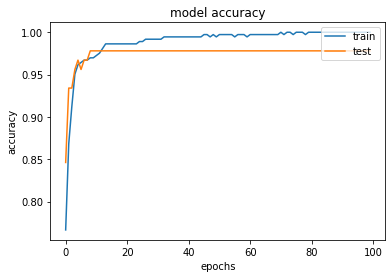

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
#plt.plot(model_history.history['loss'])
#plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [ ]:
def build_model(hp):
  model=Sequential()
  #model.add(keras.layers.Dense(None,input_dim=30))
  # no.of.layers indicate no .of.hidden layers and units indicate no of neurons in each hidden layer
  for i in range(hp.Int('no.of.layers',2,20)):
    model.add(keras.layers.Dense(units=hp.Int('units_'+str(i),min_value=32,max_value=512,step=32),
                                 activation='relu'))
  # output layer
  model.add(keras.layers.Dense(2,activation='sigmoid'))
  model.compile(optimizer='Adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  return model

In [ ]:
tuner =RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 41
no.of.layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
act0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
act1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
act2 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
act3 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu'

In [ ]:
tuner.search(X_train,Y_train,epochs=5,validation_data=(X_test,Y_test))
best_model = tuner.get_best_models()

Trial 5 Complete [00h 00m 05s]
val_loss: 0.09166199217240016

Best val_loss So Far: 0.07442521552244823
Total elapsed time: 00h 00m 38s
INFO:tensorflow:Oracle triggered exit


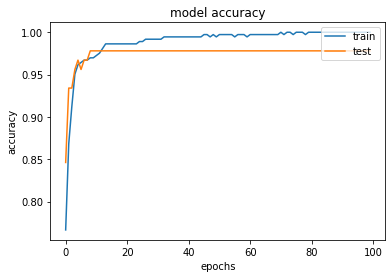

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
#plt.plot(model_history.history['loss'])
#plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
no.of.layers: 10
units_0: 320
units_1: 192
units_2: 448
units_3: 448
units_4: 384
units_5: 320
units_6: 384
units_7: 64
units_8: 416
units_9: 192
units_10: 224
units_11: 32
units_12: 192
units_13: 448
units_14: 352
units_15: 480
units_16: 128
units_17: 192
Score: 0.07442521552244823
Trial summary
Hyperparameters:
no.of.layers: 3
units_0: 160
units_1: 448
units_2: 384
units_3: 384
units_4: 192
units_5: 416
units_6: 128
units_7: 96
units_8: 224
units_9: 416
units_10: 416
units_11: 224
units_12: 96
units_13: 192
units_14: 64
units_15: 32
units_16: 512
units_17: 192
units_18: 320
Score: 0.08280072609583537
Trial summary
Hyperparameters:
no.of.layers: 5
units_0: 224
units_1: 128
units_2: 480
units_3: 448
units_4: 224
units_5: 384
units_6: 32
units_7: 192
units_8: 160
units_9: 96
units_10: 96
units_11: 96
units_12: 128
units_13: 320
units_14: 256
units_15: 64
units_16: 256
units_17: 320
units_